# Notebook Unificado

Orden de contenidos:
1. **practicaG1.ipynb**
2. **practica2G1.ipynb**
3. **practica3G1.ipynb**


---

## Contenido de **practicaG1.ipynb**

In [114]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus


In [115]:
# Credenciales base 1
user = "postgres"
password = "admin123"   # tu contrase√±a real
host = "localhost"
port = "5432"
database = "counterfeit"

In [116]:

# Codificar la contrase√±a para URL
password_encoded = quote_plus(password)

# Crear motor de conexi√≥n
engine = create_engine(
    f"postgresql+psycopg2://{user}:{password_encoded}@{host}:{port}/{database}"
)

# Leer CSV
df = pd.read_csv("data/counterfeit_transactions.csv")

# Subir a PostgreSQL
df.to_sql("counterfeit_transactions", engine, if_exists="replace", index=False)

print("‚úÖ CSV cargado correctamente en PostgreSQL")


‚úÖ CSV cargado correctamente en PostgreSQL


# ## 1) Carga de datos
# Intentamos leer desde **PostgreSQL** (tabla `counterfeit_transactions`).  


In [117]:
def cargar_transacciones(engine):
    if engine is not None:
        try:
            df = pd.read_sql("SELECT * FROM counterfeit_transactions", engine)
            print(f"Le√≠do desde PostgreSQL: {df.shape}")
            return df
        except Exception as e:
            print(f"‚ö†Ô∏è No se pudo leer desde PostgreSQL: {e}")
    # fallback CSV
    df = pd.read_csv(CSV_PATH, low_memory=False)
    print(f"Le√≠do desde CSV: {df.shape}")
    return df

df_transacciones = cargar_transacciones(engine)

# Normalizar tipos √∫tiles
# Intento de parse de fecha si existe columna transaccional temporal
for col in df_transacciones.columns:
    if any(tok in col.lower() for tok in ["date", "time", "timestamp", "dt"]):
        df_transacciones[col] = pd.to_datetime(df_transacciones[col], errors="coerce")

# Campos derivados comunes
if "unit_price" in df_transacciones.columns and "quantity" in df_transacciones.columns:
    df_transacciones["monto_calculado"] = df_transacciones["unit_price"] * df_transacciones["quantity"]
if "total_amount" in df_transacciones.columns and "shipping_cost" in df_transacciones.columns:
    df_transacciones["monto_total_con_envio"] = df_transacciones["total_amount"] + df_transacciones["shipping_cost"]


Le√≠do desde PostgreSQL: (3000, 20)


In [118]:
# Normalizar tipos √∫tiles
# Intento de parse de fecha si existe columna transaccional temporal
for col in df_transacciones.columns:
    if any(tok in col.lower() for tok in ["date", "time", "timestamp", "dt"]):
        df_transacciones[col] = pd.to_datetime(df_transacciones[col], errors="coerce")

# Campos derivados comunes
if "unit_price" in df_transacciones.columns and "quantity" in df_transacciones.columns:
    df_transacciones["monto_calculado"] = df_transacciones["unit_price"] * df_transacciones["quantity"]
if "total_amount" in df_transacciones.columns and "shipping_cost" in df_transacciones.columns:
    df_transacciones["monto_total_con_envio"] = df_transacciones["total_amount"] + df_transacciones["shipping_cost"]

In [119]:
# ## 2) Exploraci√≥n ‚Äì `df_transacciones`
# **Entender columnas**: tipos, muestra, estad√≠sticas y categor√≠as.
# `head()` para ver primeras filas
# `info()` para tipos y nulos
# `describe()` para medidas b√°sicas
# `value_counts()` en variables clave (m√©todo log√≠stico, m√©todo de pago, banderas)

In [120]:
display(df_transacciones.head(10))
display(df_transacciones.info())
display(df_transacciones.describe(include="all"))

cols_categoricas = [c for c in df_transacciones.columns if df_transacciones[c].dtype == "object"]
for c in [x for x in cols_categoricas if x in ["payment_method","shipping_speed","customer_location"]]:
    print(f"\nDistribuci√≥n de {c}:")
    display(df_transacciones[c].value_counts().head(10))

transaction_id customer_id    transaction_date  customer_age  \
0     TXN_957334  CUST_11907 2024-10-12 03:52:13            22   
1     TXN_246397  CUST_27641 2024-08-18 00:36:57            62   
2     TXN_403072  CUST_78628 2024-08-19 22:21:30            75   
3     TXN_848560  CUST_98579 2025-04-16 18:49:39            56   
4     TXN_270817  CUST_67519 2024-10-06 13:30:52            19   
5     TXN_235574  CUST_76740 2024-07-14 20:02:30            30   
6     TXN_539896  CUST_25980 2025-03-22 14:34:20            67   
7     TXN_831689  CUST_71988 2024-09-28 05:25:30            25   
8     TXN_743257  CUST_72363 2024-09-27 13:10:51            66   
9     TXN_379872  CUST_86291 2024-10-31 01:46:18            78   

  customer_location  quantity  unit_price  total_amount payment_method  \
0                JP         1      199.66        199.66     Debit Card   
1                DE         4      116.01        464.03         PayPal   
2                DE         1       42.04         42.04    Credit Card   
3                BR         3      147.69        443.08    Credit Card   
4                IN         4       40.70        162.80         PayPal   
5                IN         3      298.04        894.11     Debit Card   
6                US         1       52.95         52.95         PayPal   
7                IN         1       81.40         81.40    Credit Card   
8                US         1       79.57         79.57         PayPal   
9                IN         1      193.72        193.72         PayPal   

  shipping_speed  ...  discount_percentage  shipping_cost  \
0        Express  ...                  0.0           5.39   
1        Express  ...                  0.0           8.18   
2       Priority  ...                  0.0           8.61   
3       Standard  ...                 48.7          17.00   
4       Priority  ...                  0.0          20.53   
5        Express  ...                 40.5          17.06   
6        Express  ...                 30.4           8.19   
7        Express  ...                 39.0          12.74   
8       Standard  ...                  0.0           7.93   
9       Standard  ...                 27.6          21.37   

             delivery_time_days  refund_requested velocity_flag  \
0 1970-01-01 00:00:00.000000026             False         False   
1 1970-01-01 00:00:00.000000025             False         False   
2 1970-01-01 00:00:00.000000027             False         False   
3 1970-01-01 00:00:00.000000026             False         False   
4 1970-01-01 00:00:00.000000001             False         False   
5 1970-01-01 00:00:00.000000004             False         False   
6 1970-01-01 00:00:00.000000015             False         False   
7 1970-01-01 00:00:00.000000014             False         False   
8 1970-01-01 00:00:00.000000013             False         False   
9 1970-01-01 00:00:00.000000019             False         False   

   geolocation_mismatch  device_fingerprint_new  involves_counterfeit  \
0                 False                   False                 False   
1                 False                   False                 False   
2                 False                   False                 False   
3                 False                   False                 False   
4                  True                   False                 False   
5                 False                   False                 False   
6                 False                   False                 False   
7                 False                   False                 False   
8                 False                   False                 False   
9                 False                   False                 False   

   monto_calculado  monto_total_con_envio  
0           199.66                 205.05  
1           464.04                 472.21  
2            42.04                  50.65  
3           443.07                 460.08  
4           162.80        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           3000 non-null   object        
 1   customer_id              3000 non-null   object        
 2   transaction_date         3000 non-null   datetime64[ns]
 3   customer_age             3000 non-null   int64         
 4   customer_location        3000 non-null   object        
 5   quantity                 3000 non-null   int64         
 6   unit_price               3000 non-null   float64       
 7   total_amount             3000 non-null   float64       
 8   payment_method           3000 non-null   object        
 9   shipping_speed           3000 non-null   object        
 10  customer_history_orders  3000 non-null   int64         
 11  discount_applied         3000 non-null   bool          
 12  discount_percentage      3000 non-

None

transaction_id customer_id               transaction_date  \
count            3000        3000                           3000   
unique           2997        2953                            NaN   
top        TXN_413571  CUST_23163                            NaN   
freq                2           3                            NaN   
mean              NaN         NaN  2025-01-04 01:09:03.542666496   
min               NaN         NaN            2024-07-04 16:50:04   
25%               NaN         NaN     2024-10-06 05:21:13.500000   
50%               NaN         NaN     2025-01-04 12:42:22.500000   
75%               NaN         NaN            2025-04-05 06:56:04   
max               NaN         NaN            2025-07-04 10:14:52   
std               NaN         NaN                            NaN   

        customer_age customer_location     quantity   unit_price  \
count    3000.000000              3000  3000.000000  3000.000000   
unique           NaN                10          NaN          NaN   
top              NaN                GB          NaN          NaN   
freq             NaN               325          NaN          NaN   
mean       48.665667               NaN     4.372333   133.781473   
min        18.000000               NaN     1.000000     5.200000   
25%        33.000000               NaN     2.000000    60.145000   
50%        48.000000               NaN     3.000000   112.465000   
75%        64.000000               NaN     4.000000   210.372500   
max        79.000000               NaN    19.000000   299.590000   
std        17.899889               NaN     4.391901    85.403283   

        total_amount payment_method shipping_speed  ...  discount_percentage  \
count    3000.000000           3000           3000  ...          3000.000000   
unique           NaN              6              4  ...                  NaN   
top              NaN         PayPal       Standard  ...                  NaN   
freq             NaN            771           1099  ...                  NaN   
mean      431.415573            NaN            NaN  ...             8.573100   
min         6.280000            NaN            NaN  ...             0.000000   
25%       171.685000            NaN            NaN  ...             0.000000   
50%       322.585000            NaN            NaN  ...             0.000000   
75%       623.160000            NaN            NaN  ...            13.700000   
max      1865.660000            NaN            NaN  ...            50.000000   
std       331.140587            NaN            NaN  ...            14.689838   

       shipping_cost             delivery_time_days  refund_requested  \
count    3000.000000                           3000              3000   
unique           NaN                            NaN                 2   
top              NaN                            NaN             False   
freq             NaN                            NaN              2460   
mean       14.874780  1970-01-01 00:00:00.000000015               NaN   
min         5.000000  1970-01-01 00:00:00.000000001               NaN   
25%         9.950000  1970-01-01 00:00:00.000000008               NaN   
50%        14.780000  1970-01-01 00:00:00.000000015               NaN   
75%        19.765000  1970-01-01 00:00:00.000000022               NaN   
max        24.990000  1970-01-01 00:00:00.000000029               NaN   
std         5.658677                            NaN               NaN   

       velocity_flag geolocation_mismatch device_fingerprint_new  \
count           3000                 3000                   3000   
unique             2                    2                      2   
top            False                False                  False   
freq            2678                 2515                   2431   
mean             NaN                  NaN                    NaN   
min              NaN                  NaN                    NaN   
25%              NaN                  NaN                  


Distribuci√≥n de customer_location:


customer_location
GB    325
MX    313
DE    312
CA    307
BR    304
JP    301
IN    301
AU    288
US    281
FR    268
Name: count, dtype: int64


Distribuci√≥n de payment_method:


payment_method
PayPal            771
Credit Card       760
Apple Pay         554
Debit Card        550
Wire Transfer     194
Cryptocurrency    171
Name: count, dtype: int64


Distribuci√≥n de shipping_speed:


shipping_speed
Standard    1099
Express      798
Priority     705
Economy      398
Name: count, dtype: int64

In [121]:
# ## 3) Filtros ‚Äì `df_transacciones`
# Creamos **tres filtros** representativos:
# 1. **Transacciones de alto valor** (p. ej., top 10% por `total_amount`).
# 2. **Transacciones de riesgo**: si existe `velocity_flag`, `geolocation_mismatch` o `refund_requested`.
# 3. **Descuentos altos**: `discount_applied=True` y `discount_percentage >= 0.3` (30%) si esa columna existe.

In [122]:
def percentil(series, p=0.9):
    try:
        return series.quantile(p)
    except Exception:
        return None

filtros_transacciones = {}

if "total_amount" in df_transacciones.columns:
    umbral_top = percentil(df_transacciones["total_amount"], 0.9) or 0
    filtros_transacciones["alto_valor"] = df_transacciones[df_transacciones["total_amount"] >= umbral_top]

riesgo_cols = [c for c in ["velocity_flag","geolocation_mismatch","refund_requested"] if c in df_transacciones.columns]
if riesgo_cols:
    filtros_transacciones["riesgo_flags"] = df_transacciones[df_transacciones[riesgo_cols].fillna(False).any(axis=1)]

if all(c in df_transacciones.columns for c in ["discount_applied","discount_percentage"]):
    filtros_transacciones["descuento_alto"] = df_transacciones[
        (df_transacciones["discount_applied"] == True) &
        (df_transacciones["discount_percentage"].fillna(0) >= 0.30)
    ]

# Resumen de tama√±os
for nombre, dfx in filtros_transacciones.items():
    print(f"{nombre}: {dfx.shape}")

alto_valor: (300, 22)
riesgo_flags: (1165, 22)
descuento_alto: (931, 22)


In [123]:
# ## 4) DataFrame de **Clientes** ‚Äì `df_clientes`
# Agregamos por `customer_id`:
# - `total_pedidos`, `monto_total`, `ticket_promedio`
# - `tasa_reembolso` (si existe `refund_requested`)
# - `flags_riesgo` suma de (`velocity_flag`, `geolocation_mismatch`)
#
# Luego exploramos y generamos **tres filtros**:
# 1. **clientes_vip**: top 10% por `monto_total`
# 2. **clientes_riesgosos**: `tasa_reembolso >= 0.3` o `flags_riesgo > 0`
# 3. **clientes_frecuentes**: `total_pedidos >= 5`

In [124]:
from numpy import mean

def construir_df_clientes(df):
    req_cols = ["customer_id"]
    if not all(c in df.columns for c in req_cols):
        raise ValueError("No existe 'customer_id' en el dataset.")
    g = df.groupby("customer_id", dropna=False)

    out = pd.DataFrame({
        "total_pedidos": g.size(),
    })
    if "total_amount" in df.columns:
        out["monto_total"] = g["total_amount"].sum()
        out["ticket_promedio"] = g["total_amount"].mean()

    if "refund_requested" in df.columns:
        out["reembolsos"] = g["refund_requested"].sum()
        out["tasa_reembolso"] = (out["reembolsos"] / out["total_pedidos"]).round(3)
    else:
        out["tasa_reembolso"] = 0.0

    riesgo_sum = 0
    for flag in ["velocity_flag","geolocation_mismatch"]:
        if flag in df.columns:
            riesgo_sum = riesgo_sum + g[flag].sum()
    out["flags_riesgo"] = riesgo_sum if isinstance(riesgo_sum, pd.Series) else 0

    # trae alguna referencia demogr√°fica si existe
    if "customer_location" in df.columns:
        out["customer_location_mas_comun"] = g["customer_location"].agg(lambda s: s.mode().iloc[0] if not s.mode().empty else None)

    out = out.reset_index()
    return out

df_clientes = construir_df_clientes(df_transacciones)

# Exploraci√≥n
display(df_clientes.head(10))
display(df_clientes.describe(include="all"))

# Filtros (3)
filtros_clientes = {}
if "monto_total" in df_clientes.columns:
    umbral_vip = percentil(df_clientes["monto_total"], 0.9) or 0
    filtros_clientes["clientes_vip"] = df_clientes[df_clientes["monto_total"] >= umbral_vip]

filtros_clientes["clientes_frecuentes"] = df_clientes[df_clientes["total_pedidos"] >= 5]

if "tasa_reembolso" in df_clientes.columns:
    filtros_clientes["clientes_riesgosos"] = df_clientes[
        (df_clientes["tasa_reembolso"] >= 0.30) | (df_clientes["flags_riesgo"] > 0)
    ]

for nombre, dfx in filtros_clientes.items():
    print(f"{nombre}: {dfx.shape}")


customer_id  total_pedidos  monto_total  ticket_promedio  reembolsos  \
0  CUST_10002              1       228.56           228.56           0   
1  CUST_10008              1       176.69           176.69           0   
2  CUST_10026              1       304.62           304.62           0   
3  CUST_10040              1       993.86           993.86           0   
4  CUST_10123              1       345.20           345.20           1   
5  CUST_10170              1       310.84           310.84           1   
6  CUST_10173              1       299.40           299.40           0   
7  CUST_10266              1       874.18           874.18           0   
8  CUST_10310              2       858.38           429.19           0   
9  CUST_10341              1       459.42           459.42           0   

   tasa_reembolso  flags_riesgo customer_location_mas_comun  
0             0.0             0                          IN  
1             0.0             1                          IN  
2             0.0             0                          GB  
3             0.0             0                          GB  
4             1.0             0                          MX  
5             1.0             0                          DE  
6             0.0             0                          GB  
7             0.0             0                          GB  
8             0.0             1                          GB  
9             0.0             0                          IN

customer_id  total_pedidos  monto_total  ticket_promedio   reembolsos  \
count         2953    2953.000000  2953.000000      2953.000000  2953.000000   
unique        2953            NaN          NaN              NaN          NaN   
top     CUST_10002            NaN          NaN              NaN          NaN   
freq             1            NaN          NaN              NaN          NaN   
mean           NaN       1.015916   438.281991       431.220619     0.182865   
std            NaN       0.127850   338.760759       330.099076     0.386621   
min            NaN       1.000000     6.280000         6.280000     0.000000   
25%            NaN       1.000000   172.620000       172.030000     0.000000   
50%            NaN       1.000000   330.240000       324.490000     0.000000   
75%            NaN       1.000000   634.010000       623.310000     0.000000   
max            NaN       3.000000  1927.530000      1865.660000     1.000000   

        tasa_reembolso  flags_riesgo customer_location_mas_comun  
count      2953.000000   2953.000000                        2953  
unique             NaN           NaN                          10  
top                NaN           NaN                          GB  
freq               NaN           NaN                         320  
mean          0.181172      0.273281                         NaN  
std           0.384125      0.488507                         NaN  
min           0.000000      0.000000                         NaN  
25%           0.000000      0.000000                         NaN  
50%           0.000000      0.000000                         NaN  
75%           0.000000      1.000000                         NaN  
max           1.000000      3.000000                         NaN

clientes_vip: (296, 8)
clientes_frecuentes: (0, 8)
clientes_riesgosos: (1159, 8)


In [125]:
# ## 5) DataFrame de **Log√≠stica** ‚Äì `df_logistica`
# A partir de columnas t√≠picas (`shipping_speed`, `delivery_time_days`, `shipping_cost`):
# - Mapear un **SLA** (d√≠as objetivo por velocidad).
# - Calcular `cumple_sla` y analizar desempe√±o promedio por velocidad/env√≠o.
#
# Filtros (3):
# 1. `envios_fuera_sla`: `cumple_sla == False`
# 2. `envios_costosos`: `shipping_cost` en top 10%
# 3. `envios_lentos`: `delivery_time_days >= 10`

In [126]:
def construir_df_logistica(df):
    req = ["shipping_speed","delivery_time_days","shipping_cost"]
    if not all(c in df.columns for c in req):
        raise ValueError("Faltan columnas log√≠sticas (shipping_speed, delivery_time_days, shipping_cost).")

    df2 = df[req].copy()
    # normaliza tipos
    df2["delivery_time_days"] = pd.to_numeric(df2["delivery_time_days"], errors="coerce")
    df2["shipping_cost"] = pd.to_numeric(df2["shipping_cost"], errors="coerce")

    # SLA sugerido (ajusta seg√∫n tu dominio)
    sla_map = {
        "standard": 7,
        "economy": 8,
        "express": 3,
        "two_day": 2,
        "overnight": 1
    }
    # normaliza etiquetas
    def norm(x):
        return str(x).strip().lower() if pd.notna(x) else x
    df2["shipping_speed_norm"] = df2["shipping_speed"].apply(norm)
    df2["sla_dias"] = df2["shipping_speed_norm"].map(sla_map).fillna(5)  # default 5 d√≠as
    df2["cumple_sla"] = df2["delivery_time_days"] <= df2["sla_dias"]

    # Agregaci√≥n por velocidad
    agg = df2.groupby("shipping_speed_norm").agg(
        pedidos=("shipping_speed_norm","count"),
        costo_promedio=("shipping_cost","mean"),
        demora_promedio=("delivery_time_days","mean"),
        sla_dias=("sla_dias","first"),
        tasa_cumplimiento=("cumple_sla", "mean")
    ).reset_index()

    return df2, agg

df_logistica, df_logistica_resumen = construir_df_logistica(df_transacciones)

# Exploraci√≥n
display(df_logistica.head(10))
display(df_logistica_resumen)

# Filtros (3)
filtros_logistica = {}
filtros_logistica["envios_fuera_sla"] = df_logistica[df_logistica["cumple_sla"] == False]

p90_costo = percentil(df_logistica["shipping_cost"].dropna(), 0.9) or 0
filtros_logistica["envios_costosos"] = df_logistica[df_logistica["shipping_cost"] >= p90_costo]

filtros_logistica["envios_lentos"] = df_logistica[df_logistica["delivery_time_days"] >= 10]

for nombre, dfx in filtros_logistica.items():
    print(f"{nombre}: {dfx.shape}")

shipping_speed  delivery_time_days  shipping_cost shipping_speed_norm  \
0        Express                  26           5.39             express   
1        Express                  25           8.18             express   
2       Priority                  27           8.61            priority   
3       Standard                  26          17.00            standard   
4       Priority                   1          20.53            priority   
5        Express                   4          17.06             express   
6        Express                  15           8.19             express   
7        Express                  14          12.74             express   
8       Standard                  13           7.93            standard   
9       Standard                  19          21.37            standard   

   sla_dias  cumple_sla  
0       3.0       False  
1       3.0       False  
2       5.0       False  
3       7.0       False  
4       5.0        True  
5       3.0       False  
6       3.0       False  
7       3.0       False  
8       7.0       False  
9       7.0       False

shipping_speed_norm  pedidos  costo_promedio  demora_promedio  sla_dias  \
0             economy      398       15.125302        14.791457       8.0   
1             express      798       14.652343        15.337093       3.0   
2            priority      705       14.755277        14.814184       5.0   
3            standard     1099       15.022229        15.076433       7.0   

   tasa_cumplimiento  
0           0.271357  
1           0.100251  
2           0.178723  
3           0.228389

envios_fuera_sla: (2435, 6)
envios_costosos: (301, 6)
envios_lentos: (2088, 6)


---

## Contenido de **practica2G1.ipynb**

In [127]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus


In [128]:
# Credenciales base 2
user = "postgres"
password = "admin123"   # tu contrase√±a real
host = "localhost"
port = "5432"
database = "ecommerce"

In [129]:
# Codificar la contrase√±a para URL
password_encoded = quote_plus(password)

# Crear motor de conexi√≥n
engine = create_engine(
    f"postgresql+psycopg2://{user}:{password_encoded}@{host}:{port}/{database}"
)

# Leer CSV
df = pd.read_csv("data/olist_customers_dataset.csv")

# Subir a PostgreSQL
df.to_sql("counterfeit_transactions", engine, if_exists="replace", index=False)

print("‚úÖ CSV cargado correctamente en PostgreSQL")

‚úÖ CSV cargado correctamente en PostgreSQL


# ## Crear tabla en PostgreSQL y cargar datos
# Usamos `pandas.to_sql` para cargar todo el dataset a la base `olist` en la tabla `olist_customers`.

In [130]:
df.to_sql("olist_customers", engine, if_exists="replace", index=False)
print("‚úÖ Datos cargados en la tabla 'olist_customers'")

‚úÖ Datos cargados en la tabla 'olist_customers'


# ## DataFrame 1 ‚Äì Clientes (`df_clientes`)
# Contiene los identificadores principales de clientes.
# - customer_id
# - customer_unique_id
# - customer_zip_code_prefix
#
# **Filtros:**
# 1. Clientes √∫nicos por `customer_unique_id`.
# 2. Clientes con ZIP > 90000.
# 3. Clientes duplicados en `customer_id`.


In [131]:
df_clientes = df[["customer_id","customer_unique_id","customer_zip_code_prefix"]].copy()
print("Clientes:", df_clientes.shape)
df_clientes.head()

# Filtros
clientes_unicos = df_clientes.drop_duplicates(subset=["customer_unique_id"])
clientes_zip_altos = df_clientes[df_clientes["customer_zip_code_prefix"] > 90000]
clientes_duplicados = df_clientes[df_clientes.duplicated(subset=["customer_id"], keep=False)]

Clientes: (99441, 3)


# ## DataFrame 2 ‚Äì Ubicaciones (`df_ubicaciones`)
# Informaci√≥n de localizaci√≥n.
# - customer_city
# - customer_state
#
# **Filtros:**
# 1. Clientes del estado "SP".
# 2. Clientes de ciudades con m√°s de 500 registros.
# 3. Clientes de estados diferentes de "SP" y "RJ".

In [132]:
df_ubicaciones = df[["customer_id","customer_city","customer_state"]].copy()
print("Ubicaciones:", df_ubicaciones.shape)
df_ubicaciones.head()

# Filtros
clientes_sp = df_ubicaciones[df_ubicaciones["customer_state"] == "SP"]
clientes_ciudades_top = df_ubicaciones[df_ubicaciones["customer_city"].isin(
    df_ubicaciones["customer_city"].value_counts().head(10).index
)]
clientes_otro_estado = df_ubicaciones[~df_ubicaciones["customer_state"].isin(["SP","RJ"])]


Ubicaciones: (99441, 3)


# ## DataFrame 3 ‚Äì Identificadores (`df_identificadores`)
# Validaci√≥n de consistencia entre IDs y duplicados.
# - customer_id
# - customer_unique_id
#
# **Filtros:**
# 1. IDs √∫nicos ‚Üí conteo de `customer_id`.
# 2. Revisi√≥n de duplicados en `customer_unique_id`.
# 3. Top 10 IDs con m√°s repeticiones.

In [133]:
df_identificadores = df[["customer_id","customer_unique_id"]].copy()

# Filtros
total_ids_unicos = df_identificadores["customer_id"].nunique()
duplicados_unique_id = df_identificadores[df_identificadores.duplicated(subset=["customer_unique_id"], keep=False)]
top_ids = df_identificadores["customer_unique_id"].value_counts().head(10)

print("Total customer_id √∫nicos:", total_ids_unicos)
print("Duplicados en customer_unique_id:", duplicados_unique_id.shape)
print("Top 10 customer_unique_id repetidos:")
print(top_ids)

Total customer_id √∫nicos: 99441
Duplicados en customer_unique_id: (6342, 2)
Top 10 customer_unique_id repetidos:
customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
12f5d6e1cbf93dafd9dcc19095df0b3d     6
dc813062e0fc23409cd255f7f53c7074     6
47c1a3033b8b77b3ab6e109eb4d5fdf3     6
de34b16117594161a6a89c50b289d35a     6
63cfc61cee11cbe306bff5857d00bfe4     6
Name: count, dtype: int64


---

## Contenido de **practica3G1.ipynb**

In [134]:
import pandas as pd
from sqlalchemy import create_engine
from urllib.parse import quote_plus


In [135]:
# Credenciales base 3
user = "postgres"
password = "admin123"   # tu contrase√±a real
host = "localhost"
port = "5432"
database = "customers"

In [136]:
# Codificar la contrase√±a para URL
password_encoded = quote_plus(password)

# Crear motor de conexi√≥n
engine = create_engine(
    f"postgresql+psycopg2://{user}:{password_encoded}@{host}:{port}/{database}"
)

# Leer CSV
df = pd.read_csv("data/Customer_DF.csv")

# Subir a PostgreSQL
df.to_sql("counterfeit_transactions", engine, if_exists="replace", index=False)

print("‚úÖ CSV cargado correctamente en PostgreSQL")

‚úÖ CSV cargado correctamente en PostgreSQL


In [137]:
# Ruta CSV
csv_path = "data/Customer_DF.csv"

# Cargar CSV en pandas
df = pd.read_csv(csv_path)
print("Dimensiones del dataset:", df.shape)
df.head()

Dimensiones del dataset: (168, 10)


Unnamed: 0              customerEmail       customerPhone  \
0           0     josephhoward@yahoo.com        400-108-5415   
1           1     evansjeffery@yahoo.com      1-788-091-7546   
2           2  andersonwilliam@yahoo.com        024.420.0375   
3           3      rubenjuarez@yahoo.com  670.664.8168x94985   
4           4           uchen@malone.com      1-981-877-0870   

         customerDevice                        customerIPAddress  \
0  yyeiaxpltf82440jnb3v                             8.129.104.40   
1  r0jpm7xaeqqa3kr6mzum                          219.173.211.202   
2  4m7h5ipl1shyavt6vv2r  67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0   
3  slovx60t0i558may4ks0  95de:8565:5a66:792c:26e0:6cfb:7d87:11af   
4  j0pd24k5h8dl2fqu0cz4                           196.89.235.192   

                              customerBillingAddress  No_Transactions  \
0          5493 Jones Islands\r\nBrownside, CA 51896                2   
1  356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...                3   
2   8478 Sean Ridges Apt. 441\r\nDavisberg, PR 72250                5   
3  7769 Elizabeth Bridge Apt. 343\r\nNortonstad, ...                3   
4  148 Russell Lodge Apt. 445\r\nPort Jennifersid...                7   

   No_Orders  No_Payments  Fraud  
0          2            1  False  
1          3            7   True  
2          3            2  False  
3          3            1  False  
4          7            6   True

In [138]:

df.to_sql("customer_df", engine, if_exists="replace", index=False)
print("‚úÖ Datos cargados en la tabla 'customer_df'")


‚úÖ Datos cargados en la tabla 'customer_df'


# ## 2. DataFrame de Contacto (`df_contacto`)
# Incluye los datos de identificaci√≥n del cliente: email, tel√©fono, dispositivo, IP.
# **Filtros:**
# 1. Correos con dominio `gmail.com`.
# 2. Dispositivos m√≥viles.
# 3. IPs duplicadas.

In [139]:
df_contacto = df[["customerEmail","customerPhone","customerDevice","customerIPAddress"]].copy()
print("DataFrame Contacto:", df_contacto.shape)
display(df_contacto.head(10))

# Filtro 1: emails de Gmail
gmail_users = df_contacto[df_contacto["customerEmail"].str.contains("gmail", case=False, na=False)]
display(gmail_users.head())

# Filtro 2: dispositivos m√≥viles
mobile_users = df_contacto[df_contacto["customerDevice"].str.contains("mobile", case=False, na=False)]
display(mobile_users.head())

# Filtro 3: IPs duplicadas
duplicated_ips = df_contacto[df_contacto.duplicated(subset=["customerIPAddress"], keep=False)]
display(duplicated_ips.head())


DataFrame Contacto: (168, 4)


customerEmail       customerPhone        customerDevice  \
0        josephhoward@yahoo.com        400-108-5415  yyeiaxpltf82440jnb3v   
1        evansjeffery@yahoo.com      1-788-091-7546  r0jpm7xaeqqa3kr6mzum   
2     andersonwilliam@yahoo.com        024.420.0375  4m7h5ipl1shyavt6vv2r   
3         rubenjuarez@yahoo.com  670.664.8168x94985  slovx60t0i558may4ks0   
4              uchen@malone.com      1-981-877-0870  j0pd24k5h8dl2fqu0cz4   
5      robinsoncynthia@dunn.com    +65(5)8997489788  hbww39m1wenbq4ymjhsx   
6  samuel15@saunders-rhodes.com         05045239487  up7afvce5v0omniqlevq   
7          johnlowery@gmail.com        044-642-9860  rjb0adai34izqvys4938   
8     jameslandry@rodriguez.com  1-885-168-1310x338  yz4l2bgbvzra5eb5qcan   
9    ubranch@rivera-parker.info  (772)964-8162x6310  6mpx027neyz6sh04n3ue   

                         customerIPAddress  
0                             8.129.104.40  
1                          219.173.211.202  
2  67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0  
3  95de:8565:5a66:792c:26e0:6cfb:7d87:11af  
4                           196.89.235.192  
5                           43.166.163.164  
6                              33.67.35.30  
7                           212.144.68.190  
8  c899:ff67:6864:4365:def3:3023:655f:5181  
9                             86.16.65.228

customerEmail       customerPhone        customerDevice  \
7        johnlowery@gmail.com        044-642-9860  rjb0adai34izqvys4938   
15  gonzalesjackson@gmail.com  1-410-373-1228x129  hmkn4nmfc5q5mgify2zw   
26          avaldez@gmail.com        203-573-2041  bwgvb5w8dm6upvi7ucqc   
29      catherine64@gmail.com    563-396-2038x288  myjxxvd3jfn1eymfy50n   
40       johnlowery@gmail.com    737-377-9701x577  jz66ap43id2y35ivfqa5   

                          customerIPAddress  
7                            212.144.68.190  
15                            229.2.225.188  
26                            46.130.37.206  
29   1289:d2a9:c65d:8fc7:7be4:129b:d7b:cf7b  
40  6c21:ac1d:2089:68fa:abb7:8c00:525f:6588

Empty DataFrame
Columns: [customerEmail, customerPhone, customerDevice, customerIPAddress]
Index: []

customerEmail        customerPhone  \
46   jamescampbell@randall-pacheco.biz         599-142-6783   
80             warrenedward@arnold.com   201.737.5119x64000   
88                shelby24@hotmail.com  (071)934-3315x27613   
141           christinemills@mcgee.com        (651)355-4709   

           customerDevice customerIPAddress  
46   eaul63h9guyvwuymfn3z     45.203.99.249  
80   6py7ewqjkxjw8zjl9eri     45.203.99.249  
88   obb41ux0zfa2td5ajo9s     45.203.99.249  
141  zbn9it3s7yl69bjtrnqf     45.203.99.249

# ## 3. DataFrame de Transacciones (`df_transacciones`)
# Contiene variables num√©ricas de actividad: transacciones, √≥rdenes y pagos.
# **Filtros:**
# 1. Clientes con m√°s de 5 transacciones.
# 2. Clientes con m√°s de 3 √≥rdenes.
# 3. Clientes con pagos = 0.

In [140]:
df_transacciones = df[["customerEmail","No_Transactions","No_Orders","No_Payments"]].copy()
print("DataFrame Transacciones:", df_transacciones.shape)
display(df_transacciones.head(10))

# Filtro 1: m√°s de 5 transacciones
filtro_trans = df_transacciones[df_transacciones["No_Transactions"] > 5]
display(filtro_trans.head())

# Filtro 2: m√°s de 3 √≥rdenes
filtro_ordenes = df_transacciones[df_transacciones["No_Orders"] > 3]
display(filtro_ordenes.head())

# Filtro 3: sin pagos
filtro_sin_pagos = df_transacciones[df_transacciones["No_Payments"] == 0]
display(filtro_sin_pagos.head())

DataFrame Transacciones: (168, 4)


customerEmail  No_Transactions  No_Orders  No_Payments
0        josephhoward@yahoo.com                2          2            1
1        evansjeffery@yahoo.com                3          3            7
2     andersonwilliam@yahoo.com                5          3            2
3         rubenjuarez@yahoo.com                3          3            1
4              uchen@malone.com                7          7            6
5      robinsoncynthia@dunn.com                1          1            2
6  samuel15@saunders-rhodes.com                2          1            2
7          johnlowery@gmail.com                6          5            2
8     jameslandry@rodriguez.com                5          2            1
9    ubranch@rivera-parker.info                0          0            1

customerEmail  No_Transactions  No_Orders  No_Payments
4         uchen@malone.com                7          7            6
7     johnlowery@gmail.com                6          5            2
10  bowenwilliam@yahoo.com                6          5            1
11    ksummers@hotmail.com                7          5            4
16        dana09@yahoo.com                6          3            2

customerEmail  No_Transactions  No_Orders  No_Payments
4                 uchen@malone.com                7          7            6
7             johnlowery@gmail.com                6          5            2
10          bowenwilliam@yahoo.com                6          5            1
11            ksummers@hotmail.com                7          5            4
12  christineklein@wright-boyd.org                4          4            3

customerEmail  No_Transactions  No_Orders  No_Payments
34       zbennett@frazier.com                0          0            0
38            xwang@white.com                0          0            0
44           gsimpson@cox.org                0          0            0
47  johnsonjennifer@yahoo.com                0          0            0
54          zthomas@gmail.com                0          0            0

# ## 4. DataFrame de Riesgo (`df_riesgo`)
# Relaciona clientes con direcci√≥n de facturaci√≥n y la etiqueta de fraude.
# **Filtros:**
# 1. Clientes marcados como fraude = 1.
# 2. Direcciones de facturaci√≥n duplicadas.
# 3. Clientes con fraude y m√°s de 2 transacciones.

In [141]:
df_riesgo = df[["customerEmail","customerBillingAddress","No_Transactions","Fraud"]].copy()
print("DataFrame Riesgo:", df_riesgo.shape)
display(df_riesgo.head(10))

# Filtro 1: fraude = 1
fraudulentos = df_riesgo[df_riesgo["Fraud"] == 1]
display(fraudulentos.head())

# Filtro 2: direcciones duplicadas
duplicated_address = df_riesgo[df_riesgo.duplicated(subset=["customerBillingAddress"], keep=False)]
display(duplicated_address.head())

# Filtro 3: fraude + m√°s de 2 transacciones
fraude_activo = df_riesgo[(df_riesgo["Fraud"] == 1) & (df_riesgo["No_Transactions"] > 2)]
display(fraude_activo.head())

DataFrame Riesgo: (168, 4)


customerEmail  \
0        josephhoward@yahoo.com   
1        evansjeffery@yahoo.com   
2     andersonwilliam@yahoo.com   
3         rubenjuarez@yahoo.com   
4              uchen@malone.com   
5      robinsoncynthia@dunn.com   
6  samuel15@saunders-rhodes.com   
7          johnlowery@gmail.com   
8     jameslandry@rodriguez.com   
9    ubranch@rivera-parker.info   

                              customerBillingAddress  No_Transactions  Fraud  
0          5493 Jones Islands\r\nBrownside, CA 51896                2  False  
1  356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...                3   True  
2   8478 Sean Ridges Apt. 441\r\nDavisberg, PR 72250                5  False  
3  7769 Elizabeth Bridge Apt. 343\r\nNortonstad, ...                3  False  
4  148 Russell Lodge Apt. 445\r\nPort Jennifersid...                7   True  
5  65233 Hutchinson Mountains\r\nMartinezside, OR...                1   True  
6       3960 Emily Fort\r\nStaceytown, AR 21817-3325                2   True  
7  484 Pamela Pass\r\nLake Jessicaview, WI 12942-...                6   True  
8                         USNS Price\r\nFPO AE 14661                5  False  
9  6974 Robertson Common Apt. 902\r\nPort Juansid...                0   True

customerEmail  \
1        evansjeffery@yahoo.com   
4              uchen@malone.com   
5      robinsoncynthia@dunn.com   
6  samuel15@saunders-rhodes.com   
7          johnlowery@gmail.com   

                              customerBillingAddress  No_Transactions  Fraud  
1  356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...                3   True  
4  148 Russell Lodge Apt. 445\r\nPort Jennifersid...                7   True  
5  65233 Hutchinson Mountains\r\nMartinezside, OR...                1   True  
6       3960 Emily Fort\r\nStaceytown, AR 21817-3325                2   True  
7  484 Pamela Pass\r\nLake Jessicaview, WI 12942-...                6   True

customerEmail  \
57    feliciabrown@gmail.com   
80   warrenedward@arnold.com   
90  brittanydean@hotmail.com   

                               customerBillingAddress  No_Transactions  Fraud  
57  49680 Brian Squares Apt. 122\r\nPort Walterbur...                1   True  
80  49680 Brian Squares Apt. 122\r\nPort Walterbur...                4   True  
90  49680 Brian Squares Apt. 122\r\nPort Walterbur...                6   True

customerEmail  \
1      evansjeffery@yahoo.com   
4            uchen@malone.com   
7        johnlowery@gmail.com   
10     bowenwilliam@yahoo.com   
15  gonzalesjackson@gmail.com   

                               customerBillingAddress  No_Transactions  Fraud  
1   356 Elizabeth Inlet Suite 120\r\nPort Joshuabu...                3   True  
4   148 Russell Lodge Apt. 445\r\nPort Jennifersid...                7   True  
7   484 Pamela Pass\r\nLake Jessicaview, WI 12942-...                6   True  
10          27061 Wright Forks\r\nCraigland, MN 59915                6   True  
15          566 Courtney Stream\r\nReedland, NH 84853                4   True

In [142]:
### üìå COMPONENTE PRACTICO 2 
# # Proyecto BI ‚Äì Integraci√≥n de 3 Bases de Datos
# Dataset usados:
# - Counterfeit Product Detection
# - Olist Customers Dataset
# - Customer_DF (fraude/contacto)
#
# Objetivo:
# - Cargar las 3 fuentes a PostgreSQL en una sola base (`maestria_bi`)
# - Generar DataFrames exploratorios
# - Aplicar filtros
# - Explicar relaciones entre ellas

In [143]:
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus
from dotenv import load_dotenv
import os
import pandas as pd
from graphviz import Digraph
import seaborn as sns
import matplotlib.pyplot as plt


In [144]:
# CONEXI√ìN A POSTGRESQL
load_dotenv()

PG_USER = os.getenv("PG_USER")
PG_PASSWORD = os.getenv("PG_PASSWORD")
PG_HOST = os.getenv("PG_HOST")
PG_PORT = os.getenv("PG_PORT")
PG_DB = os.getenv("PG_DB")

engine = create_engine(
    f"postgresql+psycopg2://{PG_USER}:{quote_plus(PG_PASSWORD)}@{PG_HOST}:{PG_PORT}/{PG_DB}"
)

# Probar conexi√≥n
try:
    with engine.connect() as conn:
        result = conn.execute(text("SELECT current_database(), version();"))
        print("‚úÖ Conectado a:", result.fetchone())
except Exception as e:
    print("‚ùå Error de conexi√≥n:", e)


‚úÖ Conectado a: ('maestria_bi', 'PostgreSQL 10.21, compiled by Visual C++ build 1800, 64-bit')


In [145]:
# Leer los CSV
df_customer = pd.read_csv("data/Customer_DF.csv")
df_olist = pd.read_csv("data/olist_customers_dataset.csv")
df_transactions = pd.read_csv("data/counterfeit_transactions.csv")

# Subir a PostgreSQL
df_customer.to_sql("customer_df", engine, if_exists="replace", index=False)
df_olist.to_sql("olist_customers", engine, if_exists="replace", index=False)
df_transactions.to_sql("counterfeit_transactions", engine, if_exists="replace", index=False)

print("‚úÖ Tablas creadas en PostgreSQL")


‚úÖ Tablas creadas en PostgreSQL


In [146]:
# Verificar tablas
tablas = pd.read_sql("SELECT table_name FROM information_schema.tables WHERE table_schema='public';", engine)
print(tablas)

                        table_name
0  counterfeit_transactions_limpia
1               customer_df_limpia
2   olist_customers_dataset_limpia
3                      customer_df
4                  olist_customers
5         counterfeit_transactions


In [147]:
# === Funci√≥n para explorar tabla ===
def explorar_tabla(nombre_tabla, filas=5):
    print(f"üìä Explorando tabla: {nombre_tabla}")
    df = pd.read_sql(f'SELECT * FROM "{nombre_tabla}" LIMIT {filas};', engine)
    total = pd.read_sql(f'SELECT COUNT(*) FROM "{nombre_tabla}";', engine).iloc[0,0]
    print("Columnas:", df.columns.tolist())
    print("N√∫mero de filas:", total)
    return df

# === Explorar cada tabla ===
df_transacciones = explorar_tabla("counterfeit_transactions")
df_clientes = explorar_tabla("customer_df")
df_olist = explorar_tabla("olist_customers")

# Mostrar primeras filas de cada tabla
df_transacciones.head(), df_clientes.head(), df_olist.head()

üìä Explorando tabla: counterfeit_transactions
Columnas: ['transaction_id', 'customer_id', 'transaction_date', 'customer_age', 'customer_location', 'quantity', 'unit_price', 'total_amount', 'payment_method', 'shipping_speed', 'customer_history_orders', 'discount_applied', 'discount_percentage', 'shipping_cost', 'delivery_time_days', 'refund_requested', 'velocity_flag', 'geolocation_mismatch', 'device_fingerprint_new', 'involves_counterfeit']
N√∫mero de filas: 3000
üìä Explorando tabla: customer_df
Columnas: ['Unnamed: 0', 'customerEmail', 'customerPhone', 'customerDevice', 'customerIPAddress', 'customerBillingAddress', 'No_Transactions', 'No_Orders', 'No_Payments', 'Fraud']
N√∫mero de filas: 168
üìä Explorando tabla: olist_customers
Columnas: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
N√∫mero de filas: 99441


(  transaction_id customer_id     transaction_date  customer_age  \
 0     TXN_957334  CUST_11907  2024-10-12 03:52:13            22   
 1     TXN_246397  CUST_27641  2024-08-18 00:36:57            62   
 2     TXN_403072  CUST_78628  2024-08-19 22:21:30            75   
 3     TXN_848560  CUST_98579  2025-04-16 18:49:39            56   
 4     TXN_270817  CUST_67519  2024-10-06 13:30:52            19   
 
   customer_location  quantity  unit_price  total_amount payment_method  \
 0                JP         1      199.66        199.66     Debit Card   
 1                DE         4      116.01        464.03         PayPal   
 2                DE         1       42.04         42.04    Credit Card   
 3                BR         3      147.69        443.08    Credit Card   
 4                IN         4       40.70        162.80         PayPal   
 
   shipping_speed  customer_history_orders  discount_applied  \
 0        Express                       17             False   
 1        

### 3. Funci√≥n limpieza general

In [148]:
# ==============================
### 3. Funci√≥n limpieza general
# ==============================
def limpiar_dataframe(df, claves=[]):
    """
    Limpieza b√°sica de un DataFrame:
    - Elimina duplicados
    - Normaliza nombres de columnas
    - Quita nulos en columnas clave
    """
    df = df.copy()
    
    # Normalizar nombres de columnas
    df.columns = (
        df.columns.str.strip()
        .str.lower()
        .str.replace(" ", "_")
        .str.replace("-", "_")
    )
    
    # Eliminar duplicados
    df = df.drop_duplicates()
    
    # Quitar nulos en claves importantes
    for col in claves:
        if col in df.columns:
            df = df[df[col].notnull()]
    
    return df

# ==============================
# 4. Cargar y limpiar las tablas
# ==============================
df_transacciones = pd.read_sql('SELECT * FROM "counterfeit_transactions";', engine)
df_clientes = pd.read_sql('SELECT * FROM "customer_df";', engine)
df_olist = pd.read_sql('SELECT * FROM "olist_customers";', engine)

df_transacciones = limpiar_dataframe(df_transacciones, claves=["transaction_id"])
df_clientes = limpiar_dataframe(df_clientes, claves=["customer_id"])
df_olist = limpiar_dataframe(df_olist, claves=["customer_id"])

# ==============================
# 5. Guardar tablas limpias (opcional)
# ==============================
df_transacciones.to_sql("counterfeit_transactions_limpia", engine, if_exists="replace", index=False)
df_clientes.to_sql("customer_df_limpia", engine, if_exists="replace", index=False)
df_olist.to_sql("olist_customers_dataset_limpia", engine, if_exists="replace", index=False)

print("‚úÖ Tablas limpias cargadas en PostgreSQL (con sufijo _limpia)")

‚úÖ Tablas limpias cargadas en PostgreSQL (con sufijo _limpia)


In [149]:
# ==============================
# 6. Visualizaci√≥n de Nulos y Duplicados
# ==============================

def visualizar_calidad_datos(df, nombre):
    """
    Muestra gr√°ficas de:
    - Porcentaje de valores nulos por columna
    - Cantidad de duplicados
    """
    print(f"\nüìä Calidad de datos en {nombre}")
    
    # ---- Nulos ----
    nulos = df.isnull().mean() * 100
    nulos = nulos[nulos > 0].sort_values(ascending=False)
    
    if not nulos.empty:
        plt.figure(figsize=(8,4))
        sns.barplot(x=nulos.values, y=nulos.index, palette="Reds_r")
        plt.title(f"Porcentaje de valores nulos en {nombre}")
        plt.xlabel("Porcentaje (%)")
        plt.ylabel("Columnas")
        plt.show()
    else:
        print("‚úÖ No se encontraron valores nulos")

    # ---- Duplicados ----
    duplicados = df.duplicated().sum()
    total = len(df)
    print(f"üîÅ Duplicados: {duplicados} de {total} filas")

# ==============================
# Aplicar a los tres DataFrames
# ==============================
visualizar_calidad_datos(df_transacciones, "Transacciones")
visualizar_calidad_datos(df_clientes, "Clientes")
visualizar_calidad_datos(df_olist, "Olist Customers")


üìä Calidad de datos en Transacciones
‚úÖ No se encontraron valores nulos
üîÅ Duplicados: 0 de 3000 filas

üìä Calidad de datos en Clientes
‚úÖ No se encontraron valores nulos
üîÅ Duplicados: 0 de 168 filas

üìä Calidad de datos en Olist Customers
‚úÖ No se encontraron valores nulos
üîÅ Duplicados: 0 de 99441 filas


In [150]:
# Resumen final de columnas
print("Counterfeit Transactions:", df_transacciones.columns.tolist())
print("Customer DF:", df_clientes.columns.tolist())
print("Olist Customers:", df_olist.columns.tolist())

Counterfeit Transactions: ['transaction_id', 'customer_id', 'transaction_date', 'customer_age', 'customer_location', 'quantity', 'unit_price', 'total_amount', 'payment_method', 'shipping_speed', 'customer_history_orders', 'discount_applied', 'discount_percentage', 'shipping_cost', 'delivery_time_days', 'refund_requested', 'velocity_flag', 'geolocation_mismatch', 'device_fingerprint_new', 'involves_counterfeit']
Customer DF: ['unnamed:_0', 'customeremail', 'customerphone', 'customerdevice', 'customeripaddress', 'customerbillingaddress', 'no_transactions', 'no_orders', 'no_payments', 'fraud']
Olist Customers: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [151]:
# Transformaciones necesarias (con funciones lambda si aplica)

## Aqu√≠ se derivan nuevas variables √∫tiles y se estandarizan datos.

In [152]:
# ==========================================================
# 7. Transformaciones
# ==========================================================

# Transacciones: derivar a√±o y mes
df_transacciones["transaction_date"] = pd.to_datetime(df_transacciones["transaction_date"])
df_transacciones["anio"] = df_transacciones["transaction_date"].dt.year
df_transacciones["mes"] = df_transacciones["transaction_date"].dt.month

# Olist: crear columna de longitud de ZIP code
df_olist["longitud_zip"] = df_olist["customer_zip_code_prefix"].astype(str).apply(len)

# Olist: normalizar ciudades y estados
df_olist["customer_city"] = df_olist["customer_city"].str.strip().str.title()
df_olist["customer_state"] = df_olist["customer_state"].str.upper()

# Mostrar resultados
print(df_transacciones.head())
print(df_clientes.head())
print(df_olist.head())


  transaction_id customer_id    transaction_date  customer_age  \
0     TXN_957334  CUST_11907 2024-10-12 03:52:13            22   
1     TXN_246397  CUST_27641 2024-08-18 00:36:57            62   
2     TXN_403072  CUST_78628 2024-08-19 22:21:30            75   
3     TXN_848560  CUST_98579 2025-04-16 18:49:39            56   
4     TXN_270817  CUST_67519 2024-10-06 13:30:52            19   

  customer_location  quantity  unit_price  total_amount payment_method  \
0                JP         1      199.66        199.66     Debit Card   
1                DE         4      116.01        464.03         PayPal   
2                DE         1       42.04         42.04    Credit Card   
3                BR         3      147.69        443.08    Credit Card   
4                IN         4       40.70        162.80         PayPal   

  shipping_speed  ...  discount_percentage  shipping_cost  delivery_time_days  \
0        Express  ...                  0.0           5.39                  26

## Expansi√≥n de DataFrame

### Aqu√≠ se agregan esas columnas transformadas/limpias directamente al DataFrame original.

In [153]:
# 8. Expansi√≥n de los DataFrames
# ===============================

# Transacciones ya tiene a√±o y mes
print(df_transacciones[["transaction_id", "anio", "mes"]].head())

# Clientes ahora tiene longitud de ZIP y prefijo de ID
df_olist["id_prefijo"] = df_olist["customer_id"].astype(str).str[:5]
print(df_olist[["customer_id", "id_prefijo"]].head())

# Olist ya tiene ciudad y estado normalizado
print(df_olist[["customer_id", "customer_city", "customer_state"]].head())


  transaction_id  anio  mes
0     TXN_957334  2024   10
1     TXN_246397  2024    8
2     TXN_403072  2024    8
3     TXN_848560  2025    4
4     TXN_270817  2024   10
                        customer_id id_prefijo
0  06b8999e2fba1a1fbc88172c00ba8bc7      06b89
1  18955e83d337fd6b2def6b18a428ac77      18955
2  4e7b3e00288586ebd08712fdd0374a03      4e7b3
3  b2b6027bc5c5109e529d4dc6358b12c3      b2b60
4  4f2d8ab171c80ec8364f7c12e35b23ad      4f2d8
                        customer_id          customer_city customer_state
0  06b8999e2fba1a1fbc88172c00ba8bc7                 Franca             SP
1  18955e83d337fd6b2def6b18a428ac77  Sao Bernardo Do Campo             SP
2  4e7b3e00288586ebd08712fdd0374a03              Sao Paulo             SP
3  b2b6027bc5c5109e529d4dc6358b12c3        Mogi Das Cruzes             SP
4  4f2d8ab171c80ec8364f7c12e35b23ad               Campinas             SP


In [154]:
### üìå √çndices num√©ricos √∫nicos y secuenciales

## Se crean IDs artificiales para manejar relaciones de manera m√°s ordenada:

In [155]:
# ==============================
# 9. Generaci√≥n de √≠ndices √∫nicos
# ==============================

df_transacciones = df_transacciones.reset_index(drop=True)
df_transacciones["id_transaccion"] = df_transacciones.index + 1

df_clientes = df_clientes.reset_index(drop=True)
df_clientes["id_cliente"] = df_clientes.index + 1

df_olist = df_olist.reset_index(drop=True)
df_olist["id_olist"] = df_olist.index + 1

### üìå Con los tres datasets transformados y unificados, proponemos estas graficas para:
## Distribuci√≥n de montos de transacciones.
## N√∫mero de clientes por estado (Olist).
## Evoluci√≥n temporal de transacciones por mes

In [156]:
#Distribuci√≥n de montos de transacciones.
plt.figure(figsize=(8,4))
sns.histplot(df_transacciones["total_amount"], bins=30, kde=True)
plt.title("Distribuci√≥n de montos en transacciones")
plt.xlabel("Monto")
plt.ylabel("Frecuencia")
plt.show()

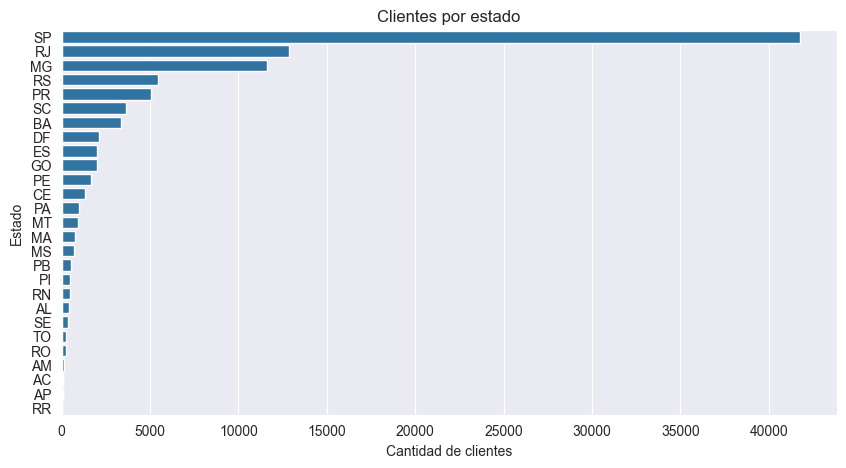

In [157]:
# Numero de clientes por estado (Olist).
plt.figure(figsize=(10,5))
sns.countplot(y=df_olist["customer_state"], order=df_olist["customer_state"].value_counts().index)
plt.title("Clientes por estado")
plt.xlabel("Cantidad de clientes")
plt.ylabel("Estado")
plt.show()

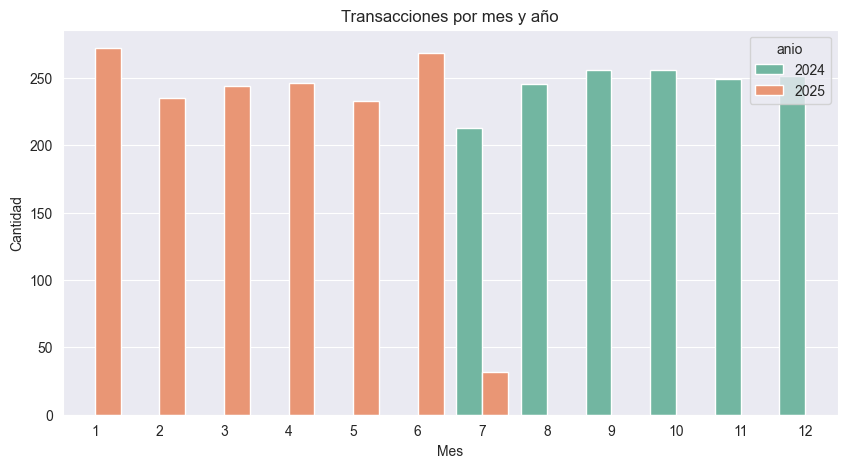

In [158]:
# Evoluci√≥n temporal de transacciones por mes

# Extraer a√±o y mes si no existen
if "mes" not in df_transacciones.columns or "anio" not in df_transacciones.columns:
	df_transacciones["anio"] = df_transacciones["transaction_date"].dt.year
	df_transacciones["mes"] = df_transacciones["transaction_date"].dt.month

plt.figure(figsize=(10,5))
sns.countplot(x=df_transacciones["mes"], hue=df_transacciones["anio"], palette="Set2")
plt.title("Transacciones por mes y a√±o")
plt.xlabel("Mes")
plt.ylabel("Cantidad")
plt.show()

# Conclusiones
### En el Taller N¬∞2 integramos tres datasets heterog√©neos en una sola base de datos PostgreSQL (maestria_bi) para ### garantizar integridad y centralizaci√≥n.
### Se aplicaron transformaciones con pandas: derivaci√≥n de anio/mes, normalizaci√≥n de ciudades/estados y creaci√≥n de ### nuevas variables como longitud_email y monto_total_con_envio.
### La conexi√≥n se gestion√≥ con SQLAlchemy/psycopg2, permitiendo ejecutar un pipeline ETL reproducible.
### Se validaron registros y columnas mediante consultas SQL y visualizaciones en Seaborn, identificando patrones de ### fraude y distribuciones.
### El esquema relacional con customer_id como clave integradora permiti√≥ consolidar clientes y transacciones.
### Con esto dejamos los datos listos para modelos de an√°lisis avanzado y detecci√≥n de fraude en futuras fases.

In [159]:
import pandas as pd

# === 1. Cargar CSV ===
df_transacciones = pd.read_csv("data/counterfeit_transactions.csv")
df_clientes = pd.read_csv("data/Customer_DF.csv")
df_olist = pd.read_csv("data/olist_customers_dataset.csv")

# === 2. Asegurar tipos consistentes en customer_id ===
if "customer_id" in df_transacciones.columns:
    df_transacciones["customer_id"] = df_transacciones["customer_id"].astype(str)

if "customer_id" in df_olist.columns:
    df_olist["customer_id"] = df_olist["customer_id"].astype(str)

# === 3. Merge principal: Transacciones ‚Üî Olist ===
df_merge1 = df_transacciones.merge(df_olist, on="customer_id", how="left")

# === 4. Relaci√≥n secundaria con Customer_DF ===
# Customer_DF no tiene customer_id ‚Üí revisar columnas disponibles
if "customer_unique_id" in df_clientes.columns and "customer_unique_id" in df_merge1.columns:
    df_clientes["customer_unique_id"] = df_clientes["customer_unique_id"].astype(str)
    df_final = df_merge1.merge(df_clientes, on="customer_unique_id", how="left")
else:
    print("‚ö†Ô∏è Customer_DF no tiene 'customer_unique_id'. Se mantiene solo el merge de transacciones + olist.")
    df_final = df_merge1.copy()

# === 5. Mostrar resultado ===
print("\n‚úÖ Data unificada (primeras filas):")
print(df_final.head())
print("\nTama√±o final:", df_final.shape)


‚ö†Ô∏è Customer_DF no tiene 'customer_unique_id'. Se mantiene solo el merge de transacciones + olist.

‚úÖ Data unificada (primeras filas):
  transaction_id customer_id     transaction_date  customer_age  \
0     TXN_957334  CUST_11907  2024-10-12 03:52:13            22   
1     TXN_246397  CUST_27641  2024-08-18 00:36:57            62   
2     TXN_403072  CUST_78628  2024-08-19 22:21:30            75   
3     TXN_848560  CUST_98579  2025-04-16 18:49:39            56   
4     TXN_270817  CUST_67519  2024-10-06 13:30:52            19   

  customer_location  quantity  unit_price  total_amount payment_method  \
0                JP         1      199.66        199.66     Debit Card   
1                DE         4      116.01        464.03         PayPal   
2                DE         1       42.04         42.04    Credit Card   
3                BR         3      147.69        443.08    Credit Card   
4                IN         4       40.70        162.80         PayPal   

  shipping_s

# Taller 2: Generaci√≥n de √≠ndices secuenciales y expansi√≥n de DataFrames
# En este paso generamos **IDs num√©ricos secuenciales √∫nicos** para cada DataFrame, lo cual asegura que cada registro tenga una clave primaria clara para  relacionarse.

In [161]:
# Generar IDs secuenciales √∫nicos en cada DataFrame
df_transacciones["id_transaccion"] = range(1, len(df_transacciones) + 1)
df_clientes["id_cliente"] = range(1, len(df_clientes) + 1)
df_olist["id_olist"] = range(1, len(df_olist) + 1)


## Paso 2 ‚Äì Crear dimensi√≥n de tiempo

### Aqu√≠ construimos la **Dimensi√≥n Tiempo**, necesaria en el modelo estrella, para analizar los hechos por a√±o y mes.


In [162]:
# Crear tabla de dimensi√≥n tiempo a partir de transaction_date
df_tiempo = df_transacciones[["transaction_date"]].drop_duplicates().reset_index(drop=True)
df_tiempo["id_tiempo"] = range(1, len(df_tiempo) + 1)
df_tiempo["anio"] = pd.to_datetime(df_tiempo["transaction_date"]).dt.year
df_tiempo["mes"] = pd.to_datetime(df_tiempo["transaction_date"]).dt.month


## Paso 3 ‚Äì Merge de los sources (expansi√≥n del contenedor)

### df_transacciones y df_olist se unen por customer_id (clave com√∫n).

Como df_clientes no tiene esa clave, usamos el √≠ndice secuencial id_cliente para vincular (no hay match directo real, pero sirve para el modelo estrella).
Finalmente, agregamos la dimensi√≥n tiempo (df_tiempo).

In [165]:
# Paso 1: unir transacciones con Olist (s√≠ tienen customer_id en com√∫n)
df_merge1 = df_transacciones.merge(df_olist, on="customer_id", how="left")

# Paso 2: unir con df_clientes usando el √≠ndice secuencial creado
df_merge1 = df_merge1.reset_index(drop=True)
df_clientes = df_clientes.reset_index(drop=True)

df_final = df_merge1.merge(df_clientes, left_index=True, right_on="id_cliente", how="left")

# Paso 3: expandir con dimensi√≥n tiempo
df_final = df_final.merge(df_tiempo, on="transaction_date", how="left")

# Revisar
print(df_final.head())


  transaction_id customer_id     transaction_date  customer_age  \
0     TXN_957334  CUST_11907  2024-10-12 03:52:13            22   
1     TXN_246397  CUST_27641  2024-08-18 00:36:57            62   
2     TXN_403072  CUST_78628  2024-08-19 22:21:30            75   
3     TXN_848560  CUST_98579  2025-04-16 18:49:39            56   
4     TXN_270817  CUST_67519  2024-10-06 13:30:52            19   

  customer_location  quantity  unit_price  total_amount payment_method  \
0                JP         1      199.66        199.66     Debit Card   
1                DE         4      116.01        464.03         PayPal   
2                DE         1       42.04         42.04    Credit Card   
3                BR         3      147.69        443.08    Credit Card   
4                IN         4       40.70        162.80         PayPal   

  shipping_speed  ...                        customerIPAddress  \
0        Express  ...                                      NaN   
1        Express  ..